<a href="https://colab.research.google.com/github/yexf308/MAT592/blob/main/Module1/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline 
import numpy.linalg as LA

Populating the interactive namespace from numpy and matplotlib


$\def\m#1{\mathbf{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$

# Linear Discriminant Analysis
We can combine the **dimensional reduction** and **classificiation** two techniques.  

We can consider the classfication models of the following form, called **generative classifier**.
$$p(y=c | \m{x}; \theta)= \frac{p(\m{x}|y=c; \theta)p(y=c; \theta)}{\sum_{c'}p(\m{x}|y=c'; \theta)p(y=c'; \theta)} $$

- $p(y=c; \theta)$: the prior over class labels

- $p(\m{x}|y=c; \theta)$: the class
conditional density for class $c$. 

If we choose the class conditional densities in a special way, we will see that the resulting posterior
over classes is a linear function of $\m{x}$, i.e., $\log p(y=c|\m{x};\theta)=\m{w}^\top x +w_0$ The overall method is called **linear discriminant analysis (LDA)**


## Quadratic discriminant analysis 
Consider the class conditional densities are multivariate Gaussians
$$p(\m{x}|y=c,\theta) = \mathcal{N}(\m{x}|\mu_c, \Sigma_c) $$
The corresponding class posterior therefore has the form
$$ p(y=c |\m{x},\theta) \propto \pi_c \mathcal{N}(\m{x}|\mu_c, \Sigma_c) $$
where $\pi_c=p(y=c) $ the prior probability of label $c$. This model is also called **Gaussian discriminant analysis**

The log posterior over class labels is given by

$$ \log p(y=c|\m{x},\theta) = \log \pi_c -\frac{1}{2}\log |2\pi \Sigma_c|-\frac{1}{2}(\m{x}-\mu_c)^\top \Sigma_c^{-1}(\m{x}-\mu_c) +\text{const} $$

This is called the **discriminant function**. We see that the decision boundary between any two classes, $c$ and $c'$, will be a quadratic function of $\m{x}$. This is known as **quadratic discriminant analysis (QDA)**.


## Linear discriminant analysis
A special case of GDA in which the covariance matrices are
tied or shared across classes, so $\Sigma_c =\Sigma$ which is independent of $c$, we can simplify 
\begin{align}
 \log p(y=c|\m{x},\theta) &=  \underbrace{\log \pi_c - \frac{1}{2}\mu_c^\top \Sigma^{-1} \mu_c }_{=\gamma_c}+ \m{x}^\top \underbrace{\Sigma^{-1} \mu_c}_{=\beta_c} \underbrace{-\frac{1}{2}\m{x}^\top \Sigma^{-1}\m{x}+\text{const}}_{=\kappa} \\
 &= \gamma_c + \m{x}^\top \beta_c + \kappa
\end{align}

The final term $\kappa$ is independent of $c$, and hence is an irrelevant additive constant that can be dropped.

Now the discriminant function is a linear function of $\m{x}$, so the decision boundaries will be linear. This method is called **linear discriminant analysis(LDA)**.

## Fitting model by MLE
If the dataset $\c{D}=\{\m{x}^{(i)}, y^{(i)}\}_{i=1}^N$, $\m{x}^{(i)}\in\mb{R}^d$.
We will fit a GDA model using maximum likelihood estimation(MLE). 
The likelihood function is 
\begin{align}
p(\c{D}|\theta) = \Pi_{i=1}^N \Pi_{c=1}^C \pi_c^{\mb{1}_{(y^{(i)}=c)}}\c{N}(\m{x}^{(i)}|\mu_c, \Sigma_c)^{\mb{1}_{(y^{(i)}=c)}}
\end{align}

the log-likelihood is given by
\begin{align}
\log p(\c{D}|\theta)= \sum_{c=1}^C \sum_{i: y^{(i)}=c}\left(\log(\pi_c) + \log \c{N}(\m{x}^{(i)}|\mu_c, \Sigma_c)\right)
\end{align}

- MLE for the prior is $\hat\pi_c = \frac{N_c}{N}$. 

- MLEs for the Gaussians 
   - $\hat\mu_c= \frac{1}{N_c}\sum_{y^{(i)}=c}\m{x}^{(i)}$

   - $\hat \Sigma_c = \frac{1}{N_c}\sum_{y^{(i)}=c}(\m{x}^{(i)} -\hat\mu_c)(\m{x}^{(i)} -\hat\mu_c)^\top $

Unfortunately the MLE for $\hat{\Sigma}_c$ can easily overfit if $N_c$ is relatively small compared to $d$. 

### 1. Tied covariances

We can force $\Sigma_c=\Sigma$, then it becomes LDA. This also
usually results in a more reliable parameter estimate, since we can pool all the samples across classes. 

\begin{align}
\hat\Sigma = \frac{1}{N}\sum_{c=1}^C \sum_{y^{(i)}=c}(\m{x}^{(i)} -\hat\mu_c)(\m{x}^{(i)} -\hat\mu_c)^\top 
\end{align}

### 2. Diagonal covariances
We can force $\Sigma_c$ to be diagonal, we reduce the number of parameters from $Cd^2$ to $Cd$. So it avoids the overfitting but loses the ability to capture correlations between the
features. This is similar to Naive Bayes idea.



## Nearest centroid classifier 
We can compute the most probable class label as follows: 
\begin{align}
\hat y(\m{x})=\arg\max_c p(y=c |\m{x},\theta)=\arg\min_c \frac{1}{2}(\m{x}-\mu_c)^\top \Sigma^{-1}(\m{x}-\mu_c) - \log\pi_c
\end{align}
This is called the **nearest centroid classifier** since
we are assigning $\m{x}$ to the class with the closest $\mu_c$ where distance is measured using (squared)
Mahalanobis distance.


<img src="https://github.com/yexf308/MAT592/blob/main/image/LDA1.png?raw=true" width="400" />

We can also use other distance metric 
\begin{align}
\hat y(\m{x})= \arg\min_c d^2(\m{x},\mu_c)
\end{align}
One simple approach is to use
\begin{align}
d^2(\m{x},\mu_c)=\|\m{x}-\mu_c\|_W^2=(\m{x}-\mu_c)^\top (WW^\top) (\m{x}-\mu_c) =\| W(\m{x}-\mu_c)\|_2^2
\end{align}
The corresponding class posterior becomes
\begin{align}
p(y=c | \m{x},\mu, W)= \frac{\exp(-\frac{1}{2}\| W(\m{x}-\mu_c)\|_2^2 )}{\sum_{c'=1}^C \exp(-\frac{1}{2}\| W(\m{x}-\mu_{c'})\|_2^2 }
\end{align}

We can optimize $W$ using gradient descent applied to the discriminative loss. This is called **nearest
class mean metric learning**.

In [ ]:
from scipy.stats import multivariate_normal 

Sigma1 = np.array([[4, 1], [1, 2]])
Sigma2 = np.array([[2, 0], [0, 1]])
Sigma3 = np.eye(2)

models = [([[0, 0], [0, 4], [4, 4]],
           [Sigma1, Sigma2, Sigma3])]


ngrid = 200 
n_samples = 50  # number of each class samples

In [ ]:
def Gaussian2d(x, y, u, sigma):
    xx, yy = np.meshgrid(x, y)
    xy = np.c_[xx.ravel(), yy.ravel()]
    sigma_inv = np.linalg.inv(sigma)
    z = np.dot((xy - u), sigma_inv)
    z = np.sum(z * (xy - u), axis=1)
    z = np.exp(-0.5 * z)
    z = z / (2 * np.pi * np.linalg.det(sigma) ** 0.5)
    return z.reshape(xx.shape)

In [ ]:
def make_data(u, sigma):
     # generate random points
    x = []  # store sample points
    labels = []  # store class labels
    nclasses  = len(u) # means
    for i in range(nclasses):
        x.append(np.random.multivariate_normal(u[i], sigma[i], n_samples))
        labels.append([i] * n_samples)
    return x, labels

In [ ]:
def make_grid(x):
    points = np.vstack(x)
    x_min, y_min = np.min(points, axis=0)
    x_max, y_max = np.max(points, axis=0)
    x_range = np.linspace(x_min - 1, x_max + 1, ngrid)
    y_range = np.linspace(y_min - 1, y_max + 1, ngrid)
    xx, yy = np.meshgrid(x_range, y_range)
    return xx, yy, x_range, y_range

In [ ]:
def plot_points(x):
    c = 'bgr'
    m = 'xos'
    for i, point in enumerate(x):
        plt.plot(point[:, 0], point[:, 1], c[i] + m[i])

In [ ]:
def plot_contours(xx, yy, x_range, y_range, u, sigma):
    nclasses = len(u)
    c = 'bgr'
    m = 'xos'
    for i in range(nclasses):
        prob = Gaussian2d(x_range, y_range, u[i], sigma[i])
        cs = plt.contour(xx, yy, prob, colors=c[i])

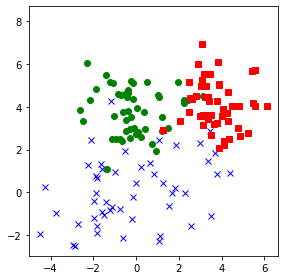

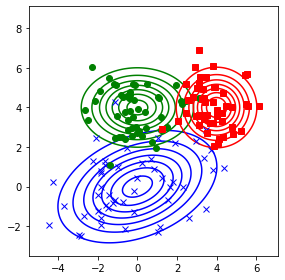

In [ ]:
for u, sigma in models:
    x, labels = make_data(u, sigma)
    xx, yy, x_range, y_range = make_grid(x)
    X = np.vstack(x)
    Y = np.hstack(labels)
    
    plt.figure()
    plot_points(x)
    plt.axis('square')
    plt.tight_layout()
    plt.show()

    plt.figure()
    plot_points(x)
    plot_contours(xx, yy, x_range, y_range, u, sigma)
    plt.axis('square')
    plt.tight_layout()
    plt.show()


In [ ]:
def make_fit(X,Y,model):
  Y_unique = unique(Y)
  L = len(Y_unique)
  N = X.shape[0]
  D = X.shape[1]

  Pi    = zeros(L)
  Mu    = zeros([L,D])
  

  if model == 'QDA':
    Sigma = [[] for _ in range(L)]
    for l in range(L):
      X_l      = X[Y==Y_unique[l]]
      Pi[l]    = X_l.shape[0]/N
      Mu[l]    = mean(X_l, axis=0)
      Sigma[l] = cov(X_l.T)
  else: # LDA
    Sigma = zeros([D,D])
    for l in range(L):
      X_l      = X[Y==Y_unique[l]]
      Pi[l]    = X_l.shape[0]/N
      Mu[l]    = mean(X_l, axis=0)
      Sigma = Sigma + cov(X_l.T)*(X_l.shape[0]-1)

    Sigma = Sigma/N  

  return Pi, Mu, Sigma   

  
  

In [ ]:
def predict(Pi, Mu, Sigma, model, Xtest):
  # by default, the labels are 0, 1, 2..
  N = Xtest.shape[0]
  L = Mu.shape[0]
  ypred = zeros(N)

  if model == 'QDA':
    for i in range(N):
      Xtest_i = Xtest[i]
      w = zeros(L)
      for l in range(L):
        w[l]=1/2* (Xtest_i - Mu[l]).dot(solve(Sigma[l], (Xtest_i - Mu[l]) )) - log(Pi[l])
      ypred[i] = argmin(w) 
  else: #LDA
    for i in range(N):
      Xtest_i = Xtest[i]
      w = zeros(L)
      for l in range(L):
        w[l]=1/2*(Xtest_i - Mu[l]).dot(solve(Sigma, (Xtest_i - Mu[l]) )) - log(Pi[l])
      ypred[i] = argmin(w) 

  return ypred    


In [ ]:
for u, sigma in models:
    x, labels = make_data(u, sigma)
    xx, yy, x_range, y_range = make_grid(x)
    Xtest = np.vstack(x)
    ytest = np.hstack(labels)

The test error for QDA is  0.05333333333333334


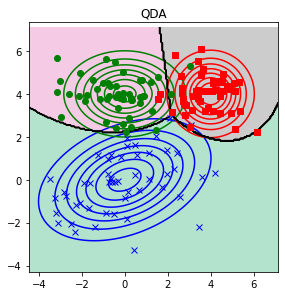

In [ ]:
model = 'QDA'
Pi, Mu, Sigma  = make_fit(X,Y,model)

ypred = predict(Pi, Mu, Sigma, model, Xtest)
print('The test error for QDA is ', norm(ytest-ypred,0)/ytest.shape[0])

Z = predict(Pi, Mu, Sigma, model, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

figure()
plot_points(x)
plot_contours(xx, yy, x_range, y_range, u, sigma)

plt.axis('square')
plt.tight_layout()
plt.contourf(Z, extent=(x_range[0], x_range[-1], y_range[0], y_range[-1]),
                cmap="Pastel2")
plt.contour(Z, extent=(x_range[0], x_range[-1], y_range[0], y_range[-1]),
                linewidths=1, colors='k')
plt.title('QDA')
plt.show()

The test error for LDA is  0.04


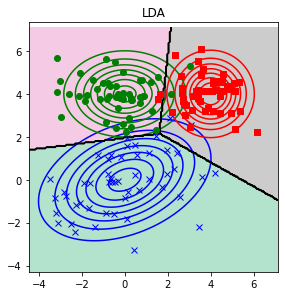

In [ ]:
model = 'LDA'
Pi, Mu, Sigma  = make_fit(X,Y,model)

ypred = predict(Pi, Mu, Sigma, model, Xtest)
print('The test error for LDA is ', norm(ytest-ypred,0)/ytest.shape[0])


Z = predict(Pi, Mu, Sigma, model, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

figure()
plot_points(x)
plot_contours(xx, yy, x_range, y_range, u, sigma)

plt.axis('square')
plt.tight_layout()
plt.contourf(Z, extent=(x_range[0], x_range[-1], y_range[0], y_range[-1]),
                cmap="Pastel2")
plt.contour(Z, extent=(x_range[0], x_range[-1], y_range[0], y_range[-1]),
                linewidths=1, colors='k')
plt.title('LDA')
plt.show()

## Fisher’s linear discriminant analysis
LDA or QDA could be problematic in high dimensions due to overfitting issue. 

- One possible solution is to reduce the dimensionality of the features $\m{x}\in \mb{R}^D$, such as PCA, $\m{z}=W\m{x}$ and then perform LDA\QDA to the resulting low-dimensional features $\m{z}\in\mb{R}^k$. PCA is an unsupervised technique that does not take
class labels into account. Thus the resulting low dimensional features are not necessarily optimal for
classification. 

- A better way is to find the matrix $W$ such that the low-dimensional data can be classified as well as possible using
a Gaussian class-conditional density model. This approach is called
 **Fisher’s linear discriminant analysis**, or **FLDA**.

### Optimal 1d projection
We derive this optimal direction $\m{w}$, for the two-class case, define the class-conditional means as
\begin{align}
\mu_1 = \frac{1}{N_1}\sum_{y^{(i)}=1}\m{x}^{(i)}, \ \ \ \mu_2 = \frac{1}{N_2}\sum_{y^{(i)}=2}\m{x}^{(i)}
\end{align}

Let $\m{z}^{(i)}=\m{w}^\top \m{x}^{(i)}$ be the
projection of the data $\{\m{x}^{(i)}, y^{(i)}\}_{i=1}^N$ onto the line. Denote the projection of each mean onto the line $\m{w}$ as $m_1=\m{w}^\top\mu_1$ and $m_2=\m{w}^\top\mu_2$. The variance of the projected points is proportional to 
\begin{align}
s_k^2 = \sum_{y^{(i)}=k}(\m{z}^{(i)}-m_k)^2
\end{align}

**Goal:** Find $\m{w}$ such that we maximize the distance between the means, $m_1-m_2$, while also ensuring the projected clusters are “tight”, which we can do by minimizing their variance. 

The objective function is 
\begin{align}
J(\m{w})&=\frac{(m_2-m_1)^2}{s_1^2 +s_2^2} \\
&=\frac{\m{w}^\top S_B \m{w}}{\m{w}^\top S_W \m{w}}
\end{align}
where $S_B=(\mu_2-\mu_1)(\mu_2-\mu_1)^\top$ is between-class scatter matrix and $S_W=\sum_{y^{(i)}=1}(\m{x}^{(i)}-\mu_1)(\m{x}^{(i)}-\mu_1)^\top +\sum_{y^{(i)}=2}(\m{x}^{(i)}-\mu_2)(\m{x}^{(i)}-\mu_2)^\top $ is the within-class scatter matrix. Both matrices are PSD 

Note 
\begin{align}
&\m{w}^\top S_B \m{w} = \m{w}^\top(\mu_2-\mu_1)(\mu_2-\mu_1)^\top\m{w} = (m_2-m_1)^2 \\
&\m{w}^\top S_W \m{w} = \sum_{y^{(i)}=1} \m{w}^\top(\m{x}^{(i)}-\mu_1)(\m{x}^{(i)}-\mu_1)^\top\m{w} + \sum_{y^{(i)}=2} \m{w}^\top (\m{x}^{(i)}-\mu_2)(\m{x}^{(i)}-\mu_2)^\top \m{w} \\
&= \sum_{y^{(i)}=1} (\m{z}^{(i)}-m_1)^2 +\sum_{y^{(i)}=2} (\m{z}^{(i)}-m_2)^2
\end{align}
We can show $J(\m{w})$ is maximized when $\nabla J(\m{w})=0$. 
\begin{align}
&\nabla J(\m{w}) = \frac{(\m{w}^\top S_W \m{w}) (S_B+S_B^\top)\m{w}  - (\m{w}^\top S_B \m{w}) (S_W+S_W^\top)\m{w} }{(\m{w}^\top S_W \m{w})^2}=0  
\end{align}
It is equivalent with  
\begin{align}
\boxed{S_B \m{w}=\lambda S_W\m{w}}
\end{align}
where $\lambda = \frac{\m{w}^\top S_B \m{w}}{\m{w}^\top S_W \m{w}}$. It is called a generalized eigenvalue problem. 

If $S_W$ is invertible, we can convert it
to a regular eigenvalue problem $S_W^{-1}S_B\m{w}=\lambda \m{w}$. Note 
\begin{align}
S_B\m{w}= (\mu_2-\mu_1)(\mu_2-\mu_1)^\top \m{w}= (\mu_2-\mu_1)(m_2-m_1)
\end{align}
So $\lambda \m{w}= S_W^{-1} (\mu_2-\mu_1)(m_2-m_1) \Rightarrow \m{w}\propto S_W^{-1} (\mu_2-\mu_1) $. Since we only care about the directionality, and not the scale factor. So the optimal solution $\m{w}^* =  S_W^{-1} (\mu_2-\mu_1)$ for two-class case. 

### Extension to higher dimensions and multiple classes

Now the projection matrix $\m{W}\in \mb{R}^{k\times d}$. Let $\m{z}^{(i)}= \m{W}\m{x}^{(i)}$ be the low dimensional projection
of the $i$th data point. 

Let $\m{m}_c = \frac{1}{N_c}\sum_{y^{(i)}=c}\m{z}^{(i)}$ be the corresponding mean for the $c$’th class and $\m{m}=\frac{1}{N}\sum_{c=1}^CN_c \m{m}_c$ be the overall mean. We define the following
scatter matrices: 

\begin{align}
&\tilde S_W = \sum_{c=1}^C \sum_{y^{(i)}=c} (\m{z}^{(i)}-\m{m}_c) (\m{z}^{(i)}-\m{m}_c)^\top \\
& \tilde S_B= \sum_{c=1}^C N_c (\m{m}_c- \m{m})(\m{m}_c- \m{m})^\top 
\end{align}
Define the objective function as maximizing the following
\begin{align}
J(\m{W})= \frac{ \text{det}(\tilde S_B) }{\text{det}(\tilde S_W) }=\frac{ \text{det}(\m{W}^\top \m{S}_B\m{W}) }{\text{det}(\m{W}^\top \m{S}_W\m{W}) }
\end{align}
where 
\begin{align}
&S_W = \sum_{c=1}^C \sum_{y^{(i)}=c} (\m{x}^{(i)}-\mu_c) (\m{x}^{(i)}-\mu_c)^\top \\
&  S_B= \sum_{c=1}^C N_c (\mu_c- \mu)(\mu_c- \mu)^\top 
\end{align}
Note $S_W$ is usually invertible, however $S_B$ has the rank at most $C-1$ (The -1 term
arises because of the $\mu$ term, which is a linear function of the $\mu_c$.) Both are symmetric matrices. 


### Optional: how to find the maximum! 
\begin{align}
\arg\max_\m{W} J(\m{W}) = \arg\max_\m{W} \log J(\m{W})
\end{align}
We will have the following theorem
$$ \frac{d}{d X}\log \text{det}(X)= (X^{-1})^\top$$

Proof: 
\begin{align}
&\nabla_{\m{W}} \log J(\m{W})= \nabla_{\m{W}} \log \text{det}(\m{W}^\top \m{S}_B\m{W}) - \nabla_{\m{W}} \log \text{det}(\m{W}^\top \m{S}_W\m{W})  \\
& = 2\left( (\m{W}^\top \m{S}_B\m{W})^{-1}\m{S}_B\m{W} -(\m{W}^\top \m{S}_W\m{W})^{-1}\m{S}_W\m{W} \right) = 0
\end{align}
So we need solve 
\begin{align}
(\m{W}^\top \m{S}_B\m{W})^{-1}\m{S}_B\m{W} =(\m{W}^\top \m{S}_W\m{W})^{-1}\m{S}_W\m{W} 
\end{align}

Define $\m{U}=S_W^{1/2}\m{W}$, then
\begin{align}
&(\m{U}^\top \m{S}_W^{-1/2}\m{S}_B \m{S}_W^{-1/2} \m{U})^{-1}(\m{S}_B\m{S}_W^{-1/2})\m{U} = (\m{U}^\top \m{U})^{-1} \m{S}_W^{1/2}\m{U} \\
&\m{S}_W^{-1/2}(\m{U}^\top \m{U})(\m{U}^\top \m{S}_W^{-1/2}\m{S}_B \m{S}_W^{-1/2} \m{U})^{-1}(\m{S}_B\m{S}_W^{-1/2}) \m{U} = \m{U}
\end{align}

Verify the eigenvectors of $\m{S}_W^{-1/2}\m{S}_B \m{S}_W^{-1/2} $ are the solution. 

$$\m{S}_W^{-1/2}\m{S}_B \m{S}_W^{-1/2} = \m{U}\Sigma \m{U}^\top$$
say $\m{u}_i$ is the $i$-th eigenvector corresponding to $\lambda_i$, the equation above becomes 
$$\m{S}_W^{-1/2} \m{I} \lambda_i^{-1} \m{S}_B\m{S}_W^{-1/2} \m{u}_i =\m{u}_i \Rightarrow \m{S}_W^{-1/2} \m{S}_B\m{S}_W^{-1/2} \m{u}_i =\lambda_i \m{u}_i$$ 

So the solution of $\m{U}$ are first $K$ leading eigenvectors of $\m{S}_W^{-1/2} \m{S}_B\m{S}_W^{-1/2}$, assuming $\m{S}_W$ is non-singular. 

Note it is restricted to finding at most a $K=C-1$ dimensional linear subspace, no matter how large $D$. This is a rather severe restriction
which limits the usefulness of FLDA. 






---

### Data on (standardized) height and weight for male and female adults 




In [ ]:
# generate data 
n = 100 
np.random.seed(0)
a = np.random.multivariate_normal((1, 3), [[4.0, 0.01], [0.01, 0.1]], n)
b = np.random.multivariate_normal((3, 1), [[4.0, 0.01], [0.01, 0.1]], n)

X = np.vstack((a, b))

Y = np.hstack((np.zeros(n), np.ones(n)))

mu_a, mu_b = a.mean(axis=0).reshape(-1,1), b.mean(axis=0).reshape(-1,1)

xmax = np.max(X[:, 0])
xmin = np.min(X[:, 0])
ymax = np.max(X[:, 1]) 
ymin = np.min(X[:, 1])

nMale = 100
nFemale = 200

In [ ]:
def plot_data(a, b):
    plt.figure()
    plt.plot(a[:,0], a[:,1], 'b.', b[:,0], b[:,1], 'r+')
    #plt.plot(mu_a, mu_b, 'black')
    plt.legend(['Male', 'Female', 'Means'])
    plt.show()

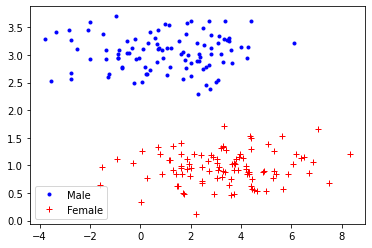

In [ ]:
plot_data(a, b)



---


### Let's try PCA first 


In [ ]:
def pca_manual(X, Y):
  # calculate the mean of each column
  M = mean(X.T, axis=1)
  # center columns by subtracting column means
  C = M - X
  # calculate covariance matrix of centered matrix
  V = cov(C.T)
  # eigendecomposition of covariance matrix
  values, vectors = eig(V)
  # project data
  P = vectors.T.dot(C.T)

  return vectors


In [ ]:
def Xproj_pca_man_cal(X, vectors):
  vector = vectors[:, 0]
  Xproj_pca = X.dot(vector)
  Xproj_pca_male = Xproj_pca[:nMale]
  Xproj_pca_female = Xproj_pca[nMale:nFemale]
  return Xproj_pca, Xproj_pca_male, Xproj_pca_female

In [ ]:
def plot_pca_vectors(a, b, vectors):
    mu_a, mu_b = a.mean(axis=0).reshape(-1,1), b.mean(axis=0).reshape(-1,1)
    mid_point = (mu_a + mu_b)/2

    vector = vectors[:, 0]
    slope_pca = vector[1]/vector[0]
    c_pca = mid_point[1] - slope_pca*mid_point[0]

    x = np.linspace(xmin+1, xmax+1, 100)
    z = np.linspace(xmin+1, xmax+1, 100)

    plt.figure()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.plot(a[:,0], a[:,1], 'b.', b[:,0], b[:,1], 'r+')
    plt.plot(z, slope_pca*z + c_pca)
    plt.legend(['Male', 'Female', 'PCA vector'])
    plt.show()

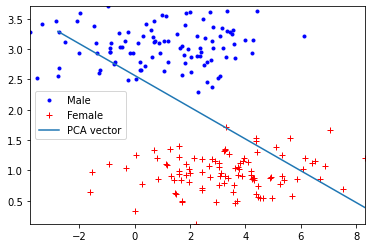

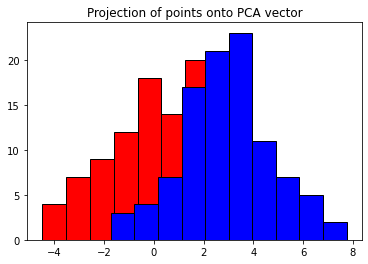

In [ ]:
# Try PCA projection! 
vectors = pca_manual(X, Y)
plot_pca_vectors(a, b, vectors)

Xproj_pca_man, Xproj_pca_male, Xproj_pca_female = Xproj_pca_man_cal(X, vectors)


plt.figure()

plt.hist(Xproj_pca_male, color='red', ec='black')
plt.hist(Xproj_pca_female, color='blue', ec='black')
plt.title('Projection of points onto PCA vector')
plt.show()

# Projection onto PCA direction shows poor class separation.



---


### Let's try FLDA


In [ ]:
def flda_manual_two_class(a, b):
    # Covariance matrices of the two datasets
    cov1 = cov(a.T)
    cov2 = cov(b.T)
    cov_tot = (cov1 + cov2)/2

    # Mean of the two datasets
    mean1 = a.mean(0)
    mean2 = b.mean(0)
    mean_diff = np.atleast_1d(mean1 - mean2)

    w = solve(cov_tot, mean_diff)
    #w = -np.linalg.pinv(cov_tot).dot(mean_diff)
    return w


In [ ]:
def Xproj_fish_man_cal(X, w):
    Xproj_fish = X.dot(w) 
    Xproj_fish_male = Xproj_fish[:nMale]
    Xproj_fish_female = Xproj_fish[nMale:nFemale]
    return Xproj_fish, Xproj_fish_male, Xproj_fish_female

In [ ]:
def plot_flda_vectors(a, b, w):
    mu_a, mu_b = a.mean(axis=0).reshape(-1,1), b.mean(axis=0).reshape(-1,1)
    mid_point = (mu_a + mu_b)/2


    slope = w[1]/w[0]
    c = mid_point[1] - slope*mid_point[0]

    x = np.linspace(xmin+1, xmax+1, 100)
    z = np.linspace(xmin+1, xmax+1, 100)

    plt.figure()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.plot(a[:,0], a[:,1], 'b.', b[:,0], b[:,1], 'r+')
    plt.plot(x, slope*x + c)
    plt.legend(['Male', 'Female', 'FisherLDA vector'])
    plt.show()

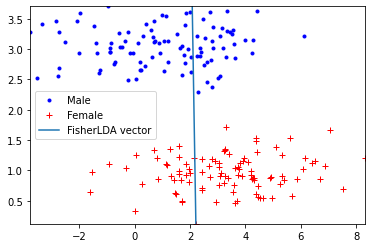

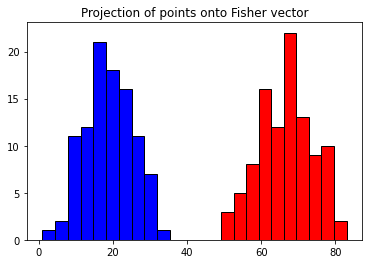

In [ ]:
w = flda_manual_two_class(a, b)

plot_flda_vectors(a, b, w)

Xproj_fish, Xproj_fish_male, Xproj_fish_female = Xproj_fish_man_cal(X, w)
plt.figure()

plt.hist(Xproj_fish_male, color='red', ec='black')
plt.hist(Xproj_fish_female, color='blue', ec='black')
plt.title('Projection of points onto Fisher vector')
plt.show()